In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

##### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [204]:
df = pd.read_csv('Model1.csv')
df.shape

(26886, 11)

#### Model 1: Single Linear regression model on Unscaled data with Label encoding - Carat
1. Important variable for the CZ diamond prediction is carat feature.
2. Coefficients and other parameters for carat vs. Price is checked

#### 4 important Assumptions:
1. **Linear relationship** : b/w the independent variable, x, and the dependent variable, y.
2. **Independence** : The independent variables are actually independent and not collinear.
3. **Homoscedasticity and Autocorrelation**: The residuals have constant variance at every level of x.
4. **Normality** : The residuals of the model are normally distributed.

In [3]:
import statsmodels.formula.api as smf

In [205]:
# Data imported from MariaJasmine_Project_PM_Q1_EDA file
df= df.drop(['Unnamed: 0'],axis=1)


In [206]:
X_M1 = df.iloc[:,0:9]

y_M1 = df['price']

In [207]:
XtrainM1,XtestM1,ytrainM1,ytestM1 = train_test_split(X_M1,y_M1,test_size=.30,random_state=123)

In [208]:
print('Number of rows and columns of the training set for the independent variables:',XtrainM1.shape)
print('Number of rows and columns of the training set for the dependent variable:',ytrainM1.shape)
print('Number of rows and columns of the test set for the independent variables:',XtestM1.shape)
print('Number of rows and columns of the test set for the dependent variable:',ytestM1.shape)

Number of rows and columns of the training set for the independent variables: (18820, 9)
Number of rows and columns of the training set for the dependent variable: (18820,)
Number of rows and columns of the test set for the independent variables: (8066, 9)
Number of rows and columns of the test set for the dependent variable: (8066,)


In [209]:
ExpressionM1 = 'price ~ carat'

In [210]:
Data_trainM1 = pd.concat([XtrainM1,ytrainM1],axis=1)
Data_testM1 = pd.concat([XtestM1,ytestM1],axis=1)

In [211]:
LR_Train_M1 = smf.ols(ExpressionM1,data=Data_trainM1).fit()

In [212]:
LR_Test_M1 = smf.ols(ExpressionM1,data=Data_testM1).fit()
LR_Test_M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 4.666e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:03:15   Log-Likelihood:                -70491.
No. Observations:                8066   AIC:                         1.410e+05
Df Residuals:                    8064   BIC:                         1.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2343.6557     33.178    -70.638      0.000   -2408.694   -2278.618
carat       7866.4723     36.419    216.001      0.000    7795.082    7937.862
==============================================================================
Omnibus:                     2262.654   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15847.712
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       9.463   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

  Residual plot for Model 1 | Train and Test data 


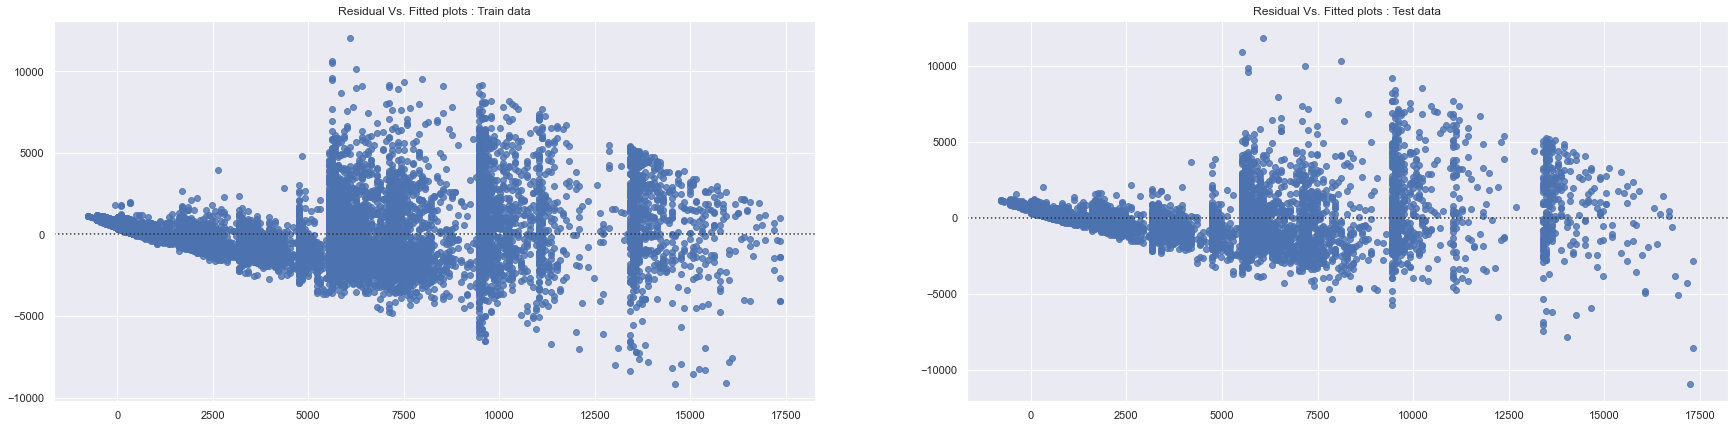

In [22]:
print('\033[1m'," Residual plot for Model 1 | Train and Test data",'\033[0m')
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
plt.title('Residual Vs. Fitted plots : Train data')
sns.residplot(x = LR_Train_M1.predict(Data_trainM1),y=LR_Train_M1.resid)
plt.subplot(1,2,2)
plt.title('Residual Vs. Fitted plots : Test data')
sns.residplot(x = LR_Test_M1.predict(Data_testM1),y=LR_Test_M1.resid)
plt.show()


1. <font color = 'green'>__Intercept p-value P>|t|:__</font> pvalue < 0.05. There is an impact of intercept on y
2. <font color = 'green'>__coef/P>|t| :__</font> pvalue < 0.05. Carat has impact on Price. Increasing Carat by 1 unit will be associated with an average increase of β1(7847.38) in Y **(Assumption #1)**
3. <font color = 'green'>__Prob (F-statistic):__</font> The coefficient is not equal to zero. There is a linear relationship between carat and price variable.  **(Assumption #1)**
4. <font color = 'green'>__Prob(Omnibus)/Prob(JB):__</font> pvalue is < 0.05. The residuals form a normal distribution.**(Assumption #4)**. Skew is slightly high and Kurtosis shows high peak due to outliers.
5. <font color = 'green'>__Durbin-Watson:__</font> Value less than 2. The residuals have constant variance at every level of x.**(Assumption #3)**
6. <font color = 'green'>__Cond. No.__</font> Value less than 30. No multi collinearity. **(Assumption #2)**
7. <font color = 'green'>__R-squared/ Adj R-squared:__</font> The feature carat is able to explain 85% variance in the Price variable.


#### Model 2: Multiple Linear regression model on data with PCA components.

In [24]:
# Data imported from MariaJasmine_Project_PM_Q1_EDA file
# df_PCA = pd.read_csv('Model2.csv')
df_PCA = df_PCA.drop(['Unnamed: 0'],axis=1)

In [25]:
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df),columns=list(df))

In [26]:
y_M2 = df_sc['price']

In [27]:
XtrainM2,XtestM2,ytrainM2,ytestM2 = train_test_split(df_PCA,y_M2,test_size=.30,random_state=123)

In [28]:
Data_trainM2 = pd.concat([XtrainM2,ytrainM2],axis=1)
Data_testM2 = pd.concat([XtestM2,ytestM2],axis=1)

In [33]:
Data_trainM2.rename(columns={'Cut&Table' : 'CutTable'},inplace=True)
Data_testM2.rename(columns={'Cut&Table' : 'CutTable'},inplace=True)

In [34]:
ExpressionM2 = 'price ~ CaratDimensions+Clarity+Depth+CutTable+Color'

In [35]:
LR_Train_M2 = smf.ols(ExpressionM2,data=Data_trainM2).fit()

In [38]:
LR_Test_M2 = smf.ols(ExpressionM2,data=Data_testM2).fit()
LR_Test_M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     9887.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:41:18   Log-Likelihood:                -3432.2
No. Observations:                8066   AIC:                             6876.
Df Residuals:                    8060   BIC:                             6918.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0003      0.004      0.084      0.933      -0.008       0.008
CaratDimensions     0.4107      0.002    204.776      0.000       0.407       0.415
Clarity             0.3549      0.005     71.606      0.000       0.345       0.365
Depth              -0.0994      0.004    -26.914      0.000      -0.107      -0.092
CutTable           -0.1378      0.004    -39.292      0.000      -0.145      -0.131
Color              -0.0199      0.004     -4.771      0.000      -0.028      -0.012
==============================================================================
Omnibus:                     1959.211   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5215.842
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       5.958   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. <font color = 'green'>__Intercept p-value P>|t|:__</font> pvalue > 0.05. The intercept has no impact on dependent variable as the Xs are scaled and the mean is zero.
2. <font color = 'green'>__coef/P>|t| :__</font> pvalue < 0.05. All features do have an impact on the Price **(Assumption #1)**
3. <font color = 'green'>__Prob (F-statistic):__</font> The coefficient is not equal to zero. There is a linear relationship between independent and price variable.  **(Assumption #1)**
4. <font color = 'green'>__Prob(Omnibus)/Prob(JB):__</font> pvalue is < 0.05. The residuals form a normal distribution.**(Assumption #4)**. Skew is slightly high and Kurtosis shows high peak due to outliers.
5. <font color = 'green'>__Durbin-Watson:__</font> Value less than 2. The residuals have constant variance at every level of x.**(Assumption #3)**
6. <font color = 'green'>__Cond. No.__</font> Value less than 30. No multi collinearity. **(Assumption #2)**
7. <font color = 'green'>__R-squared/ Adj R-squared:__</font> The feature carat is able to explain 86% variance in the Price variable.

Model 2 shows that Carat, Dimensions (x,y and z) and Clarity are the important attributes.

  Residual plot for Model 2 | Train and Test data 


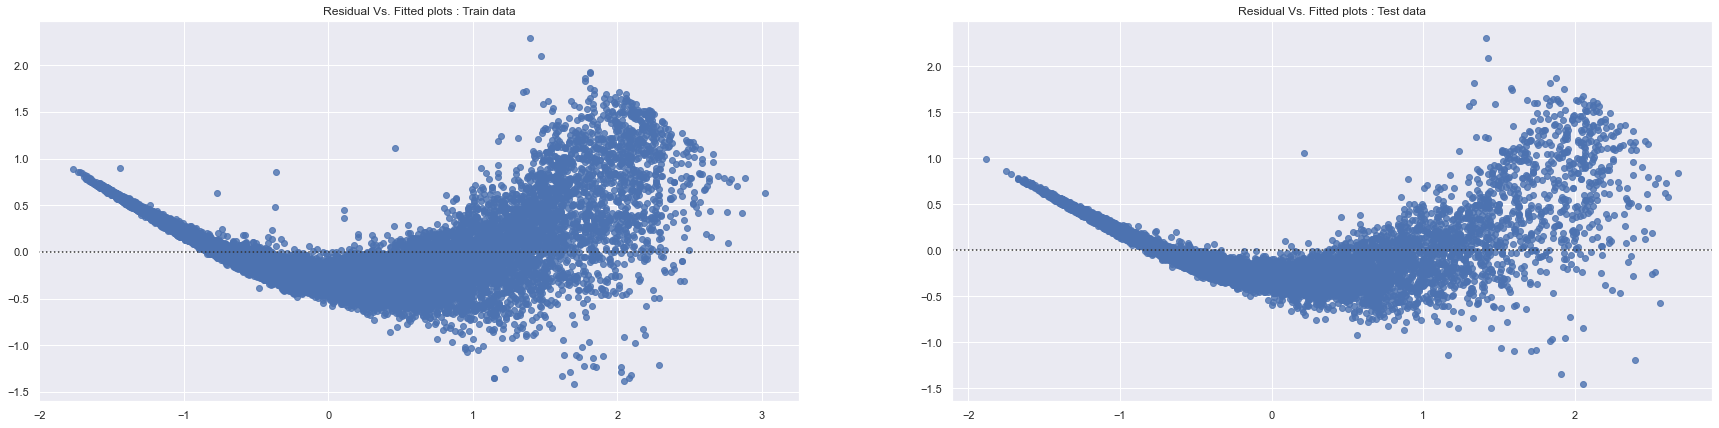

In [242]:
print('\033[1m'," Residual plot for Model 2 | Train and Test data",'\033[0m')
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
plt.title('Residual Vs. Fitted plots : Train data')
sns.residplot(x = LR_Train_M2.predict(Data_trainM2),y=LR_Train_M2.resid)
plt.subplot(1,2,2)
plt.title('Residual Vs. Fitted plots : Test data')
sns.residplot(x = LR_Test_M2.predict(Data_testM2),y=LR_Test_M2.resid);

#### Model 3: Multiple Linear regression model on Unscaled data with One hot encoding


1. From the above models it is clear that Carat, Clarity and Dimensions have important role to play in predicting the price.
2. For easy interpretation Linear regression model on Unscaled data is performed though this model has high multi collinearity.

* Data has only observations where Price <= 13000
* The Attributes like Depth,VS1,SI2,F,Good and Very Good had pvalues more than 0.05. Which means they do not have an impact on Price on Population data. Hence, they are removed one by one.

In [64]:
# Data imported from MariaJasmine_Project_PM_Q1_EDA file
# df_onehot = pd.read_csv('Model3.csv')
df_onehot=df_onehot.drop(['Unnamed: 0'],axis=1)

In [66]:
print('Total observations where Price <= 13000:',df_onehot[df_onehot['price'] <= 13000].count()[0])

Total observations where Price <= 13000: 25524


In [68]:
df_onehot1 = df_onehot[df_onehot['price'] <= 13000]

In [71]:
X_M3 = df_onehot1.drop(['price'],axis=1)

y_M3 = df_onehot1['price']

In [72]:
XtrainM3,XtestM3,ytrainM3,ytestM3 = train_test_split(X_M3,y_M3,test_size=.30,random_state=123)

In [255]:
print('Number of rows and columns of the training set for the independent variables:',XtrainM3.shape)
print('Number of rows and columns of the training set for the dependent variable:',ytrainM3.shape)
print('Number of rows and columns of the test set for the independent variables:',XtestM3.shape)
print('Number of rows and columns of the test set for the dependent variable:',ytestM3.shape)

Number of rows and columns of the training set for the independent variables: (17866, 26)
Number of rows and columns of the training set for the dependent variable: (17866,)
Number of rows and columns of the test set for the independent variables: (7658, 26)
Number of rows and columns of the test set for the dependent variable: (7658,)


In [73]:
Data_trainM3 = pd.concat([XtrainM3,ytrainM3],axis=1)
Data_testM3 = pd.concat([XtestM3,ytestM3],axis=1)

In [317]:
ExpressionM3 = 'price ~ carat+x+y+z+IF+VVS1+VVS2+I1+D+E+Ideal+Premium+Fair+J+VS2+H'

In [318]:
LR_Train_M3 = smf.ols(ExpressionM3,data=Data_trainM3).fit()

In [321]:
LR_Test_M3 = smf.ols(ExpressionM3,data=Data_testM3).fit()
LR_Test_M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     4109.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:25:49   Log-Likelihood:                -63455.
No. Observations:                7658   AIC:                         1.269e+05
Df Residuals:                    7641   BIC:                         1.271e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2665    241.217      0.084      0.933    -452.586     493.119
carat       9322.0270    159.506     58.443      0.000    9009.352    9634.702
x          -1234.4887    195.418     -6.317      0.000   -1617.562    -851.415
y           1209.6956    186.774      6.477      0.000     843.566    1575.825
z          -1106.0407    145.927     -7.579      0.000   -1392.098    -819.983
IF          1245.3851     63.200     19.705      0.000    1121.496    1369.275
VVS1        1014.0052     44.926     22.571      0.000     925.939    1102.072
VVS2        1139.6994     39.236     29.047      0.000    1062.786    1216.613
I1         -2870.8759     96.517    -29.745      0.000   -3060.075   -2681.677
D            337.7813     34.965      9.660      0.000     269.239     406.323
E            219.2306     30.314      7.232      0.000     159.807     278.654
Ideal        210.0020     26.779      7.842      0.000     157.508     262.496
Premium      104.4329     32.040      3.259      0.001      41.626     167.240
Fair        -419.5385     71.097     -5.901      0.000    -558.909    -280.168
J          -1251.8450     52.295    -23.938      0.000   -1354.357   -1149.333
VS2          479.3093     28.017     17.108      0.000     424.388     534.230
H           -284.2763     32.336     -8.791      0.000    -347.665    -220.888
==============================================================================
Omnibus:                     1968.194   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9172.189
Skew:                           1.173   Prob(JB):                         0.00
Kurtosis:                       7.821   Cond. No.                         240.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. <font color = 'green'>__Intercept p-value P>|t|:__</font> pvalue > 0.05. The intercept is not equal to zero.When X=0; y=20
2. <font color = 'green'>__coef/P>|t| :__</font> pvalue < 0.05. All features do have an impact on the Price **(Assumption #1)**
3. <font color = 'green'>__Prob (F-statistic):__</font> The coefficient is not equal to zero. There is a linear relationship between independent and price variable.  **(Assumption #1)**
4. <font color = 'green'>__Prob(Omnibus)/Prob(JB):__</font> pvalue is < 0.05. The residuals form a normal distribution.**(Assumption #4)**. Skew is slightly high and Kurtosis shows high peak due to outliers.
5. <font color = 'green'>__Durbin-Watson:__</font> Value very near to 2. The residuals have constant variance at every level of x.**(Assumption #3)**
6. <font color = 'green'>__Cond. No.__</font> Multi collinearity is reduced to an extent. **(Assumption #2)**
7. <font color = 'green'>__R-squared/ Adj R-squared:__</font> The feature carat is able to explain 89% variance in the Price variable.

Model 3 shows that the attributes like Carat, (y)-Width, IF, VVS1,VVS2, D,E Ideal and Premium has positive impact on Price

  Normal distribution check plot for Model 3 | Train and Test data 


<AxesSubplot:title={'center':'Residual plot for Normal Distribution check: Test data'}, ylabel='Count'>

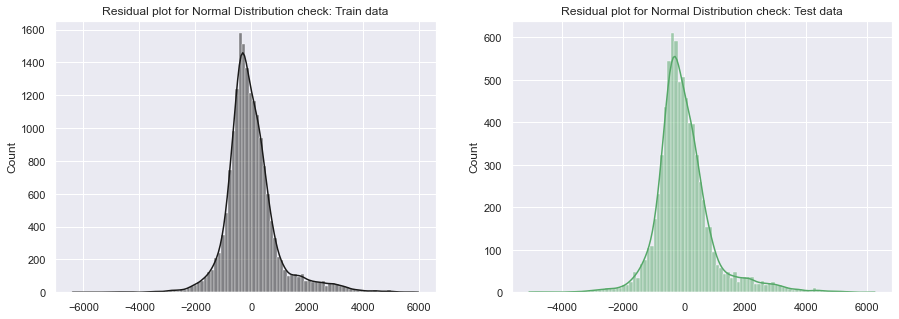

In [311]:
print('\033[1m'," Normal distribution check plot for Model 3 | Train and Test data",'\033[0m')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Residual plot for Normal Distribution check: Train data')
sns.histplot(LR_Train_M3.resid,kde=True,bins=100,color='k')
plt.subplot(1,2,2)
plt.title('Residual plot for Normal Distribution check: Test data')
sns.histplot(LR_Test_M3.resid,kde=True,bins=100,color='g')

  Residual plot for Model 3 | Train and Test data 


<AxesSubplot:title={'center':'Residual Vs. Fitted plots : Test data'}>

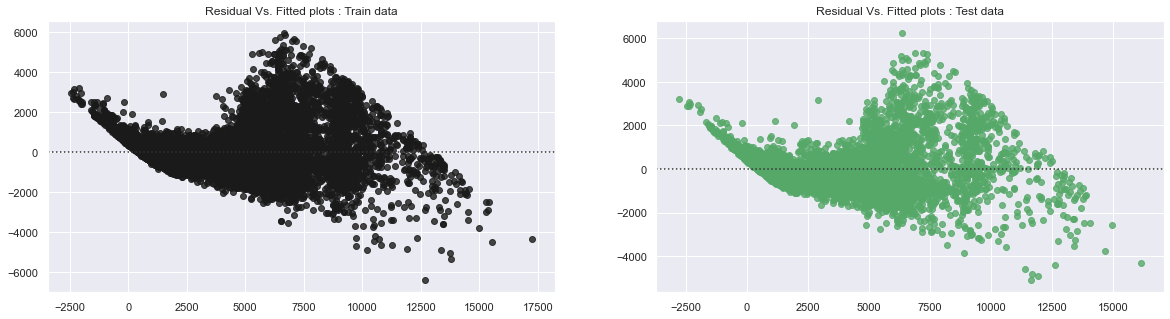

In [312]:
print('\033[1m'," Residual plot for Model 3 | Train and Test data",'\033[0m')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Residual Vs. Fitted plots : Train data')
sns.residplot(x = LR_Train_M3.predict(Data_trainM3),y=LR_Train_M3.resid,color='k')
plt.subplot(1,2,2)
plt.title('Residual Vs. Fitted plots : Test data')
sns.residplot(x = LR_Test_M3.predict(Data_testM3),y=LR_Test_M3.resid,color='g')

#### Model 4: Multiple Linear regression model using Sklearn library. (Unscaled data with One hot Encoding)

In [219]:
LR_M4 = LinearRegression()

In [220]:
LR_M4.fit(XtrainM3,ytrainM3)

LinearRegression()

In [322]:
# sklearn model:
coeff = pd.DataFrame(LR_M4.coef_,index=XtrainM3.columns).sort_values(by=0,ascending=False)
round(coeff).head(15).T

,carat,y,IF,VVS1,VVS2,D,VS1,E,F,VS2,G,Ideal,Premium,Very Good,depth
0,9984.0,1112.0,1108.0,980.0,977.0,665.0,624.0,478.0,442.0,333.0,284.0,205.0,177.0,99.0,6.0


In [328]:
R_squared = LR_M4.score(XtrainM3,ytrainM3)
print('\033[1m','With the given set of features the independent variables were able to capture', 
      round(R_squared*100,4),'% variance in dependent variable')

 With the given set of features the independent variables were able to capture 92.3812 % variance in dependent variable


In [323]:
R_squared = LR_M4.score(XtestM3,ytestM3)
print(
'\033[1m','With the given set of features the independent variables were able to capture', 
      round(R_squared*100,4),'% variance in dependent variable','\033[0m')

 With the given set of features the independent variables were able to capture 92.1858 % variance in dependent variable 


In [325]:
# Let us check the intercept for the model
intercept = LR_M4.intercept_
print('\033[1m',"The intercept for our model is =====> {}".format(intercept))

 The intercept for our model is =====> 993.1789605610834


In [224]:
from sklearn.metrics import mean_absolute_error 


print('MSE - Test: {}'.format(np.mean((LR_M4.predict(XtestM3)-ytestM3)**2)))
print('MSE - Train: {}'.format(np.mean((LR_M4.predict(XtrainM3)-ytrainM3)**2)))
print("")
print('RMSE  - Test: {}'.format(np.sqrt(np.mean((LR_M4.predict(XtestM3)-ytestM3)**2))))
print('RMSE  - Train: {}'.format(np.sqrt(np.mean((LR_M4.predict(XtrainM3)-ytrainM3)**2))))
print("")
MAE = mean_absolute_error(ytestM3,LR_M4.predict(XtestM3))
print('The Mean absolute error on Test data is:' , round(MAE,4))

MAE1 = mean_absolute_error(ytrainM3,LR_M4.predict(XtrainM3))
print('The Mean absolute error on Train data is:' , round(MAE1,4))

MSE - Test: 692012.2131581722
MSE - Train: 671576.4823071966

RMSE  - Test: 831.8727145171744
RMSE  - Train: 819.497701221423

The Mean absolute error on Test data is: 566.6447
The Mean absolute error on Train data is: 566.1262


**Mean Absolute Error (MAE),** like the RMSE, the MAE measures the prediction error. It is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.So, we can compare the performance of this model by MAE as we have lot of outliers in Price(y)

#### Model 5: Multiple Linear regression model using Sklearn library. (on PCA Components)

In [301]:
LR_M5 = LinearRegression()

In [302]:
LR_M5.fit(XtrainM2,ytrainM2)

LinearRegression()

In [305]:
# sklearn model:
coeff = pd.DataFrame(LR_M5.coef_,index=XtrainM2.columns).sort_values(by=0,ascending=False)
round(coeff,4).T

,CaratDimensions,Clarity,Color,Depth,Cut&Table
0,0.4127,0.3664,-0.0177,-0.1035,-0.14


In [326]:
R_squared = LR_M5.score(XtrainM2,ytrainM2)
print('\033[1m','With the given set of features the independent variables were able to capture', 
      round(R_squared*100,4),'% variance in dependent variable','\033[0m')

 With the given set of features the independent variables were able to capture 86.4366 % variance in dependent variable 


In [327]:
R_squared = LR_M5.score(XtestM2,ytestM2)
print('\033[1m','With the given set of features the independent variables were able to capture', 
      round(R_squared*100,4),'% variance in dependent variable')

 With the given set of features the independent variables were able to capture 85.9667 % variance in dependent variable


In [330]:
# Let us check the intercept for the model
intercept = LR_M5.intercept_
print('\033[1m',"The intercept for our model is =====> {}".format(intercept))

 The intercept for our model is =====> -0.0002775390521466102


In [308]:
from sklearn.metrics import mean_absolute_error 


print('MSE - Test: {}'.format(np.mean((LR_M5.predict(XtestM2)-ytestM2)**2)))
print('MSE - Train: {}'.format(np.mean((LR_M5.predict(XtrainM2)-ytrainM2)**2)))
print("")
print('RMSE  - Test: {}'.format(np.sqrt(np.mean((LR_M5.predict(XtestM2)-ytestM2)**2))))
print('RMSE  - Train: {}'.format(np.sqrt(np.mean((LR_M5.predict(XtrainM2)-ytrainM2)**2))))
print("")
MAE = mean_absolute_error(ytestM2,LR_M5.predict(XtestM2))
print('The Mean absolute error on Test data is:' , round(MAE,4))

MAE1 = mean_absolute_error(ytrainM2,LR_M5.predict(XtrainM2))
print('The Mean absolute error on Train data is:' , round(MAE1,4))

MSE - Test: 0.13726918193609874
MSE - Train: 0.13687491112554012

RMSE  - Test: 0.37049855861541314
RMSE  - Train: 0.36996609456211

The Mean absolute error on Test data is: 0.2827
The Mean absolute error on Train data is: 0.283


#### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [225]:
LR_Plot = smf.ols(ExpressionM3,data=Data_testM3.iloc[5000:5050,:]).fit()

####  The Residual vs fitted performed on the most important variable - Carat with 25 observations. 


1. Plot showing the actual and predicted values of Price for the variable carat
2. Residuals vs variables: To check the homoscedasticity. The residuals have constant variance with X
3. Partial regression plots show the independent relations between variables
4. The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

  Regression result plot (Carat Vs. Price) 


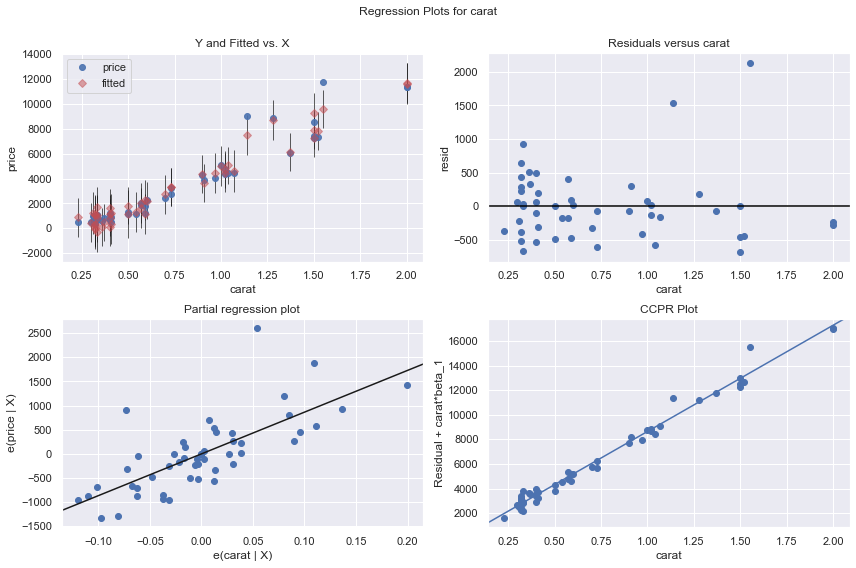

In [332]:
import statsmodels.api as sm
#define figure size
print('\033[1m'," Regression result plot (Carat Vs. Price)",'\033[0m')
fig = plt.figure(figsize=(12,8))
fig.tight_layout()

#produce regression plots
fig = sm.graphics.plot_regress_exog(LR_Plot, 'carat', fig=fig)


Best 5 attributes of for Price Prediction (Model 1, Model 2, Model 3 and Model 4:

1. **Carat** : Increasing Carat by 1 gm will be associated with an average increase of β1(9936.01) in Y
2. **y (Width)** : Increasing Width by 1 mm will be associated with an average increase of β2(1207.29) in Y
3. When Clarity =  **IF, VVS2,VVS1,VS2, SI1** positive impact on Price
4. When Color = **D and E** , positive impact on Price
5. When Cut = **Ideal, Premium**, positive impact on Price

#### Model Comparison and Conclusion:

Linear Model on PCA: As the data is scaled and multi collinearity is removed, the model is able to explain the variances in length, width and height together. The mentioned three dimensions play a vital role in price determination along with Carat size. PCA model has given high priority to Carat, Dimensions (x,y and z) and Clarity.

Linear Model on Unscaled One hot encoded data: For easy interpretation this model is performed. And yes, it has given a similar insights (check the above mentioned attributes for output). But it did not perform well on explaining the Dimensions (x,y and z). Due to high multi collinearity the co efficients are impacted among the three variables and they tend to assign negative regression slope for any two variables among them. They cannot take negative values because the Correlation coefficient for all the three variables are positive. 

In [228]:
Predicted_Price = LR_Test_M3.predict(Data_testM3)

In [229]:
Residuals = LR_Test_M3.resid

In [230]:
Analysis = Data_testM3.copy()

In [231]:
Analysis['Predicted_price'] = Predicted_Price
Analysis['Residuals'] = Residuals

In [232]:
Analysis.iloc[100:120,:].head(5)

,carat,depth,table,x,y,z,I1,IF,SI1,SI2,...,I,J,Fair,Good,Ideal,Premium,Very Good,price,Predicted_price,Residuals
22361,1.10,62.7,58.0,6.58,6.54,4.11,0,0,1,0,...,1,0,0,0,0,1,0,4435,5079.103311,-644.103311
7526,1.03,61.6,61.0,6.51,6.44,3.99,0,0,0,0,...,0,0,0,0,0,1,0,5364,5378.075094,-14.075094
8069,0.40,61.4,57.0,4.72,4.79,2.92,0,0,0,0,...,0,0,0,0,1,0,0,926,718.364511,207.635489
2629,1.08,59.4,59.0,6.68,6.75,3.99,0,0,0,0,...,0,0,0,0,0,1,0,6415,6380.818641,34.181359
9426,0.71,62.5,60.0,5.61,5.65,3.52,0,0,0,0,...,0,0,0,0,0,0,1,2745,3588.842835,-843.842835


  Scatter plot for Price Vs. Estimated or Predicted price 


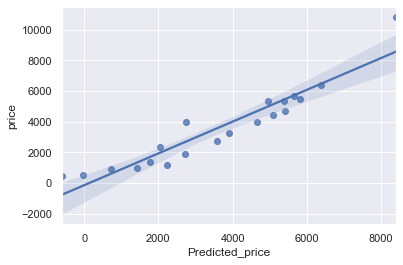

In [246]:
print('\033[1m'," Scatter plot for Price Vs. Estimated or Predicted price",'\033[0m')
sns.regplot(x='Predicted_price',y='price',data=Analysis.iloc[100:120,:])
plt.show()

### END